In [90]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
import matplotlib.dates as mdates
import squarify

In [91]:
# Read the city's csv file
wuhan_df = pd.read_csv("CleanDatasets/wuhan_AQI.csv")
wuhan_df = wuhan_df.sort_values("date")

# wuhan_df.dtypes
wuhan_df["date"] = pd.to_datetime(wuhan_df["date"])
wuhan_df

,date,pm25,pm10,o3,no2,so2,co,AQI
0,2019-01-02,131,56,13,37,3,12,131
1,2019-01-03,158,61,15,31,7,15,158
2,2019-01-04,165,72,16,28,4,14,165
3,2019-01-05,182,99,20,27,4,14,182
4,2019-01-06,224,116,16,34,7,20,224
...,...,...,...,...,...,...,...,...
554,2020-07-17,80,49,59,23,5,14,80
555,2020-07-18,109,45,25,14,3,9,109
556,2020-07-19,99,25,48,10,2,6,99
557,2020-07-20,70,64,103,15,3,9,103


In [92]:
# Create a data frame for the lockdown period of the city
wuhan_lockdown_df=wuhan_df[(wuhan_df['date']>='2020-01-23') & (wuhan_df['date']<='2020-04-08')]
wuhan_lockdown_df

,date,pm25,pm10,o3,no2,so2,co,AQI
378,2020-01-23,173,71,21,12,3,12,173
379,2020-01-24,174,39,28,7,2,5,174
380,2020-01-25,116,46,23,7,2,7,116
381,2020-01-26,131,32,30,6,3,5,131
382,2020-01-27,104,45,28,6,2,8,104
...,...,...,...,...,...,...,...,...
450,2020-04-04,156,60,61,18,5,10,156
451,2020-04-05,150,64,85,20,5,9,150
452,2020-04-06,151,55,52,17,5,7,151
453,2020-04-07,100,55,62,23,6,8,100


In [93]:
# Create a data frame for the 2019 data, same months as the lockdown period in 2020
wuhan_2019_df=wuhan_df[(wuhan_df['date']>='2019-01-23') & (wuhan_df['date']<='2019-04-08')]
wuhan_2019_df

,date,pm25,pm10,o3,no2,so2,co,AQI
21,2019-01-23,188,95,42,53,9,17,188
22,2019-01-24,191,93,47,52,9,17,191
23,2019-01-25,174,120,34,45,8,17,174
24,2019-01-26,204,115,21,31,9,17,204
25,2019-01-27,221,78,20,35,12,13,221
...,...,...,...,...,...,...,...,...
90,2019-04-04,114,78,52,42,5,13,114
91,2019-04-05,154,53,46,24,3,10,154
92,2019-04-06,122,72,63,36,6,11,122
93,2019-04-07,133,83,75,41,10,13,133


In [94]:
# Set date as index
wuhan_2019_df = wuhan_2019_df.set_index("date")


In [95]:
# Set date as index
wuhan_lockdown_df = wuhan_lockdown_df.set_index("date")


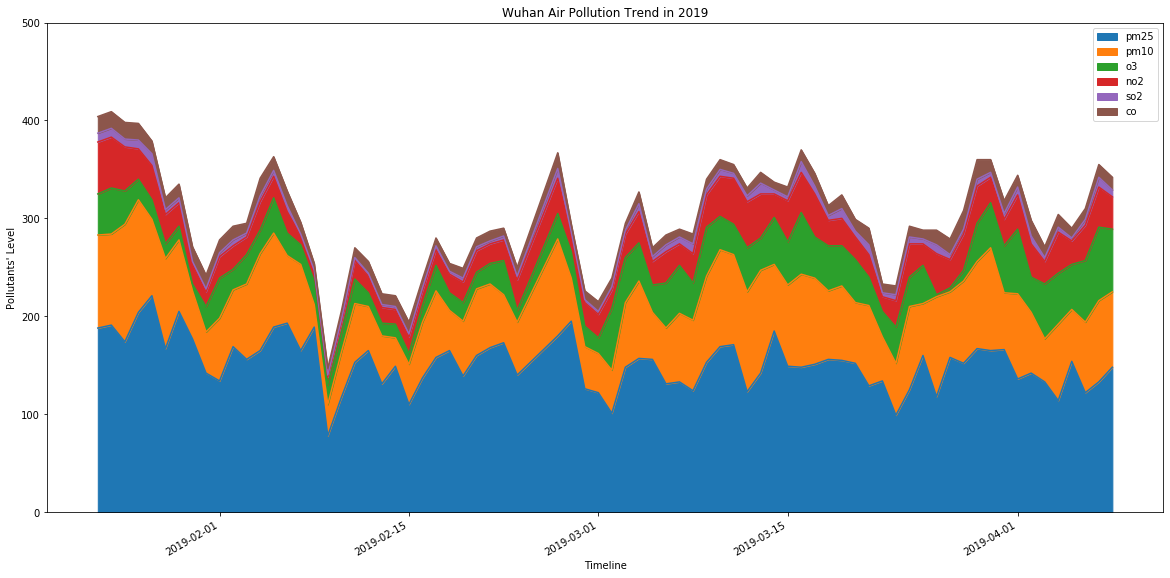

In [96]:
# Create an stacked area chart for the pollutant levels in 2019
ax = wuhan_2019_df[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].plot.area(figsize=(20,10))
# set y limit
plt.ylim(0,500)
# Creat tite, x and y label
plt.title("Wuhan Air Pollution Trend in 2019")
plt.xlabel("Timeline")
plt.ylabel("Pollutants' Level")
plt.show()

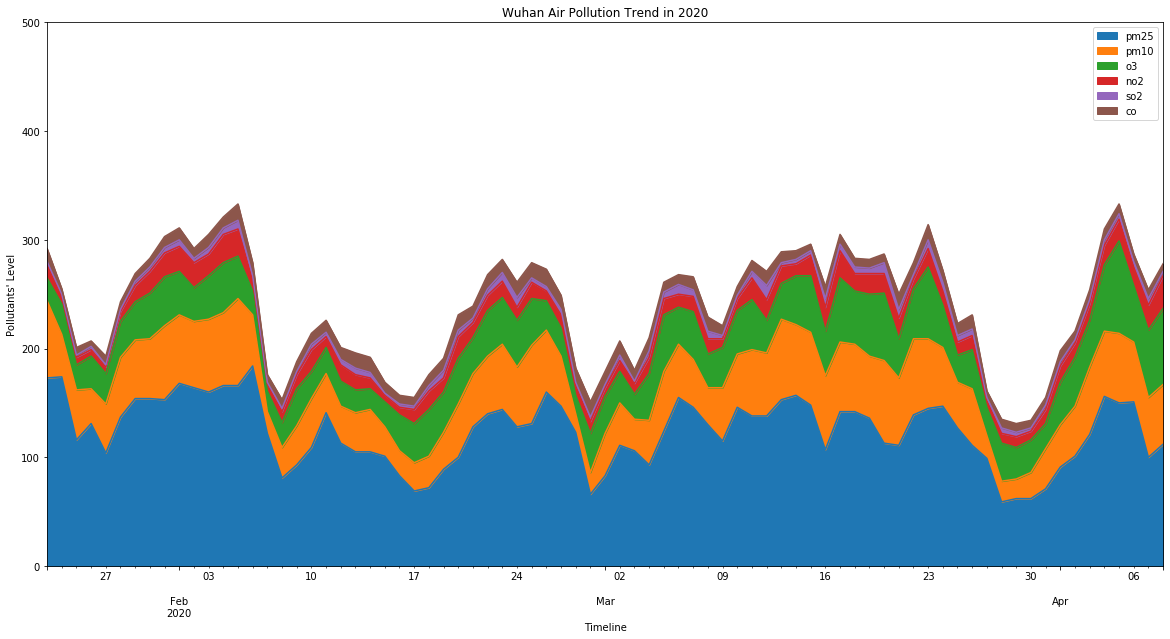

In [97]:
# Create an stacked area chart for the pollutant levels in 2019
ax = wuhan_lockdown_df[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].plot.area(figsize=(20,10))
# set y limit
plt.ylim(0,500)
# Creat tite, x and y label
plt.title("Wuhan Air Pollution Trend in 2020")
plt.xlabel("Timeline")
plt.ylabel("Pollutants' Level")
plt.show()

In [98]:
# Compute quartiles and upper and lower bounds for pm25
wuhan_2019_quartiles = wuhan_2019_df["pm25"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_2019_lowerq = wuhan_2019_quartiles[0.25]

# Compute the upper quartile
wuhan_2019_upperq = wuhan_2019_quartiles[0.75]
wuhan_2019_iqr = wuhan_2019_upperq-wuhan_2019_lowerq
print(f"The lower quartile of wuhan  is: {wuhan_2019_lowerq}")
print(f"The upper quartile of wuhan is: {wuhan_2019_upperq}")
print(f"The interquartile range of wuhan is: {wuhan_2019_iqr}")
lower_bound = wuhan_2019_lowerq - (1.5*wuhan_2019_iqr)
upper_bound = wuhan_2019_upperq + (1.5*wuhan_2019_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_2019_wuhan = wuhan_2019_df.loc[(wuhan_2019_df["pm25"] < lower_bound) | (wuhan_2019_df["pm25"] > upper_bound)]
outlier_2019_wuhan

The lower quartile of wuhan  is: 133.25
The upper quartile of wuhan is: 167.0
The interquartile range of wuhan is: 33.75
Values below 82.625 could be outliers.
Values above 217.625 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2019-01-27,221,78,20,35,12,13,221
2019-02-09,78,32,20,8,2,7,78


In [99]:
# Compute quartiles and upper and lower bounds for pm10
wuhan_2019_quartiles = wuhan_2019_df["pm10"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_2019_lowerq = wuhan_2019_quartiles[0.25]

# Compute the upper quartile
wuhan_2019_upperq = wuhan_2019_quartiles[0.75]
wuhan_2019_iqr = wuhan_2019_upperq-wuhan_2019_lowerq
print(f"The lower quartile of wuhan_2019  is: {wuhan_2019_lowerq}")
print(f"The upper quartile of wuhan_2019 is: {wuhan_2019_upperq}")
print(f"The interquartile range of wuhan_2019 is: {wuhan_2019_iqr}")
lower_bound = wuhan_2019_lowerq - (1.5*wuhan_2019_iqr)
upper_bound = wuhan_2019_upperq + (1.5*wuhan_2019_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_wuhan_2019 = wuhan_2019_df.loc[(wuhan_2019_df["pm10"] < lower_bound) | (wuhan_2019_df["pm10"] > upper_bound)]
outlier_wuhan_2019

The lower quartile of wuhan_2019  is: 53.0
The upper quartile of wuhan_2019 is: 87.75
The interquartile range of wuhan_2019 is: 34.75
Values below 0.875 could be outliers.
Values above 139.875 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


In [100]:
# Compute quartiles and upper and lower bounds for o3
wuhan_2019_quartiles = wuhan_2019_df["o3"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_2019_lowerq = wuhan_2019_quartiles[0.25]

# Compute the upper quartile
wuhan_2019_upperq = wuhan_2019_quartiles[0.75]
wuhan_2019_iqr = wuhan_2019_upperq-wuhan_2019_lowerq
print(f"The lower quartile of wuhan_2019  is: {wuhan_2019_lowerq}")
print(f"The upper quartile of wuhan_2019 is: {wuhan_2019_upperq}")
print(f"The interquartile range of wuhan_2019 is: {wuhan_2019_iqr}")
lower_bound = wuhan_2019_lowerq - (1.5*wuhan_2019_iqr)
upper_bound = wuhan_2019_upperq + (1.5*wuhan_2019_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_wuhan_2019 = wuhan_2019_df.loc[(wuhan_2019_df["o3"] < lower_bound) | (wuhan_2019_df["o3"] > upper_bound)]
outlier_wuhan_2019

The lower quartile of wuhan_2019  is: 20.0
The upper quartile of wuhan_2019 is: 44.75
The interquartile range of wuhan_2019 is: 24.75
Values below -17.125 could be outliers.
Values above 81.875 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


In [101]:
# Compute quartiles and upper and lower bounds for no2
wuhan_2019_quartiles = wuhan_2019_df["no2"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_2019_lowerq = wuhan_2019_quartiles[0.25]

# Compute the upper quartile
wuhan_2019_upperq = wuhan_2019_quartiles[0.75]
wuhan_2019_iqr = wuhan_2019_upperq-wuhan_2019_lowerq
print(f"The lower quartile of wuhan_2019  is: {wuhan_2019_lowerq}")
print(f"The upper quartile of wuhan_2019 is: {wuhan_2019_upperq}")
print(f"The interquartile range of wuhan_2019 is: {wuhan_2019_iqr}")
lower_bound = wuhan_2019_lowerq - (1.5*wuhan_2019_iqr)
upper_bound = wuhan_2019_upperq + (1.5*wuhan_2019_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_wuhan_2019 = wuhan_2019_df.loc[(wuhan_2019_df["no2"] < lower_bound) | (wuhan_2019_df["no2"] > upper_bound)]
outlier_wuhan_2019

The lower quartile of wuhan_2019  is: 20.25
The upper quartile of wuhan_2019 is: 34.75
The interquartile range of wuhan_2019 is: 14.5
Values below -1.5 could be outliers.
Values above 56.5 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


In [102]:
# Compute quartiles and upper and lower bounds for so2
wuhan_2019_quartiles = wuhan_2019_df["so2"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_2019_lowerq = wuhan_2019_quartiles[0.25]

# Compute the upper quartile
wuhan_2019_upperq = wuhan_2019_quartiles[0.75]
wuhan_2019_iqr = wuhan_2019_upperq-wuhan_2019_lowerq
print(f"The lower quartile of wuhan_2019  is: {wuhan_2019_lowerq}")
print(f"The upper quartile of wuhan_2019 is: {wuhan_2019_upperq}")
print(f"The interquartile range of wuhan_2019 is: {wuhan_2019_iqr}")
lower_bound = wuhan_2019_lowerq - (1.5*wuhan_2019_iqr)
upper_bound = wuhan_2019_upperq + (1.5*wuhan_2019_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_wuhan_2019 = wuhan_2019_df.loc[(wuhan_2019_df["so2"] < lower_bound) | (wuhan_2019_df["so2"] > upper_bound)]
outlier_wuhan_2019

The lower quartile of wuhan_2019  is: 3.25
The upper quartile of wuhan_2019 is: 7.0
The interquartile range of wuhan_2019 is: 3.75
Values below -2.375 could be outliers.
Values above 12.625 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


In [103]:
# Compute quartiles and upper and lower bounds for co
wuhan_2019_quartiles = wuhan_2019_df["co"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_2019_lowerq = wuhan_2019_quartiles[0.25]

# Compute the upper quartile
wuhan_2019_upperq = wuhan_2019_quartiles[0.75]
wuhan_2019_iqr = wuhan_2019_upperq-wuhan_2019_lowerq
print(f"The lower quartile of wuhan_2019  is: {wuhan_2019_lowerq}")
print(f"The upper quartile of wuhan_2019 is: {wuhan_2019_upperq}")
print(f"The interquartile range of wuhan_2019 is: {wuhan_2019_iqr}")
lower_bound = wuhan_2019_lowerq - (1.5*wuhan_2019_iqr)
upper_bound = wuhan_2019_upperq + (1.5*wuhan_2019_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_wuhan_2019 = wuhan_2019_df.loc[(wuhan_2019_df["co"] < lower_bound) | (wuhan_2019_df["co"] > upper_bound)]
outlier_wuhan_2019

The lower quartile of wuhan_2019  is: 9.0
The upper quartile of wuhan_2019 is: 13.75
The interquartile range of wuhan_2019 is: 4.75
Values below 1.875 could be outliers.
Values above 20.875 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


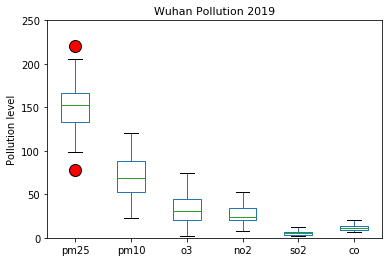

In [104]:

# Create a box plot with outliers
# plot. Set color of marker face and marker edge

flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='k')
box_plot = wuhan_2019_df.boxplot(grid=False, column=['pm25','pm10', 'o3', 'no2', 'so2', 'co'], flierprops=flierprops)
# set y limit
plt.ylim(0,250)
# Set the title and y axis label
box_plot.set_title('Wuhan Pollution 2019', fontsize=11)
box_plot.set_ylabel("Pollution level")
plt.show()

In [105]:
# Compute quartiles and upper and lower bounds for pm25
wuhan_lockdown_quartiles =wuhan_lockdown_df["pm25"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_lockdown_lowerq = wuhan_lockdown_quartiles[0.25]

# Compute the upper quartile
wuhan_lockdown_upperq = wuhan_lockdown_quartiles[0.75]
wuhan_lockdown_iqr = wuhan_lockdown_upperq-wuhan_lockdown_lowerq
print(f"The lower quartile of wuhan in lockdown is: {wuhan_lockdown_lowerq}")
print(f"The upper quartile of wuhan in lockdown is: {wuhan_lockdown_upperq}")
print(f"The interquartile range of wuhan in lockdown is: {wuhan_lockdown_iqr}")
lower_bound = wuhan_lockdown_lowerq - (1.5*wuhan_lockdown_iqr)
upper_bound =wuhan_lockdown_upperq + (1.5*wuhan_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_wuhan_lockdown = wuhan_lockdown_df.loc[(wuhan_lockdown_df["pm25"] < lower_bound) | (wuhan_lockdown_df["pm25"] > upper_bound)]
outlier_wuhan_lockdown

The lower quartile of wuhan in lockdown is: 104.0
The upper quartile of wuhan in lockdown is: 147.0
The interquartile range of wuhan in lockdown is: 43.0
Values below 39.5 could be outliers.
Values above 211.5 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


In [106]:
# Compute quartiles and upper and lower bounds for pm10
wuhan_lockdown_quartiles =wuhan_lockdown_df["pm10"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_lockdown_lowerq = wuhan_lockdown_quartiles[0.25]

# Compute the upper quartile
wuhan_lockdown_upperq = wuhan_lockdown_quartiles[0.75]
wuhan_lockdown_iqr = wuhan_lockdown_upperq-wuhan_lockdown_lowerq
print(f"The lower quartile of wuhan in lockdown is: {wuhan_lockdown_lowerq}")
print(f"The upper quartile of wuhan in lockdown is: {wuhan_lockdown_upperq}")
print(f"The interquartile range of wuhan in lockdown is: {wuhan_lockdown_iqr}")
lower_bound = wuhan_lockdown_lowerq - (1.5*wuhan_lockdown_iqr)
upper_bound =wuhan_lockdown_upperq + (1.5*wuhan_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_wuhan_lockdown = wuhan_lockdown_df.loc[(wuhan_lockdown_df["pm10"] < lower_bound) | (wuhan_lockdown_df["pm10"] > upper_bound)]
outlier_wuhan_lockdown

The lower quartile of wuhan in lockdown is: 36.0
The upper quartile of wuhan in lockdown is: 61.0
The interquartile range of wuhan in lockdown is: 25.0
Values below -1.5 could be outliers.
Values above 98.5 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


In [107]:
# Compute quartiles and upper and lower bounds for pm10
wuhan_lockdown_quartiles =wuhan_lockdown_df["o3"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_lockdown_lowerq = wuhan_lockdown_quartiles[0.25]

# Compute the upper quartile
wuhan_lockdown_upperq = wuhan_lockdown_quartiles[0.75]
wuhan_lockdown_iqr = wuhan_lockdown_upperq-wuhan_lockdown_lowerq
print(f"The lower quartile of wuhan in lockdown is: {wuhan_lockdown_lowerq}")
print(f"The upper quartile of wuhan in lockdown is: {wuhan_lockdown_upperq}")
print(f"The interquartile range of wuhan in lockdown is: {wuhan_lockdown_iqr}")
lower_bound = wuhan_lockdown_lowerq - (1.5*wuhan_lockdown_iqr)
upper_bound =wuhan_lockdown_upperq + (1.5*wuhan_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_wuhan_lockdown = wuhan_lockdown_df.loc[(wuhan_lockdown_df["o3"] < lower_bound) | (wuhan_lockdown_df["o3"] > upper_bound)]
outlier_wuhan_lockdown

The lower quartile of wuhan in lockdown is: 28.0
The upper quartile of wuhan in lockdown is: 43.0
The interquartile range of wuhan in lockdown is: 15.0
Values below 5.5 could be outliers.
Values above 65.5 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2020-03-23,145,64,66,17,8,14,145
2020-04-05,150,64,85,20,5,9,150
2020-04-08,112,55,70,30,4,7,112


In [108]:
# Compute quartiles and upper and lower bounds for no2
wuhan_lockdown_quartiles =wuhan_lockdown_df["no2"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_lockdown_lowerq = wuhan_lockdown_quartiles[0.25]

# Compute the upper quartile
wuhan_lockdown_upperq = wuhan_lockdown_quartiles[0.75]
wuhan_lockdown_iqr = wuhan_lockdown_upperq-wuhan_lockdown_lowerq
print(f"The lower quartile of wuhan in lockdown is: {wuhan_lockdown_lowerq}")
print(f"The upper quartile of wuhan in lockdown is: {wuhan_lockdown_upperq}")
print(f"The interquartile range of wuhan in lockdown is: {wuhan_lockdown_iqr}")
lower_bound = wuhan_lockdown_lowerq - (1.5*wuhan_lockdown_iqr)
upper_bound =wuhan_lockdown_upperq + (1.5*wuhan_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_wuhan_lockdown = wuhan_lockdown_df.loc[(wuhan_lockdown_df["no2"] < lower_bound) | (wuhan_lockdown_df["no2"] > upper_bound)]
outlier_wuhan_lockdown

The lower quartile of wuhan in lockdown is: 10.0
The upper quartile of wuhan in lockdown is: 18.0
The interquartile range of wuhan in lockdown is: 8.0
Values below -2.0 could be outliers.
Values above 30.0 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


In [109]:
# Compute quartiles and upper and lower bounds for so2
wuhan_lockdown_quartiles =wuhan_lockdown_df["so2"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_lockdown_lowerq = wuhan_lockdown_quartiles[0.25]

# Compute the upper quartile
wuhan_lockdown_upperq = wuhan_lockdown_quartiles[0.75]
wuhan_lockdown_iqr = wuhan_lockdown_upperq-wuhan_lockdown_lowerq
print(f"The lower quartile of wuhan in lockdown is: {wuhan_lockdown_lowerq}")
print(f"The upper quartile of wuhan in lockdown is: {wuhan_lockdown_upperq}")
print(f"The interquartile range of wuhan in lockdown is: {wuhan_lockdown_iqr}")
lower_bound = wuhan_lockdown_lowerq - (1.5*wuhan_lockdown_iqr)
upper_bound =wuhan_lockdown_upperq + (1.5*wuhan_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_wuhan_lockdown = wuhan_lockdown_df.loc[(wuhan_lockdown_df["so2"] < lower_bound) | (wuhan_lockdown_df["so2"] > upper_bound)]
outlier_wuhan_lockdown

The lower quartile of wuhan in lockdown is: 3.0
The upper quartile of wuhan in lockdown is: 6.0
The interquartile range of wuhan in lockdown is: 3.0
Values below -1.5 could be outliers.
Values above 10.5 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2020-03-12,138,58,30,19,13,13,138


In [110]:
# Compute quartiles and upper and lower bounds for co
wuhan_lockdown_quartiles =wuhan_lockdown_df["co"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_lockdown_lowerq = wuhan_lockdown_quartiles[0.25]

# Compute the upper quartile
wuhan_lockdown_upperq = wuhan_lockdown_quartiles[0.75]
wuhan_lockdown_iqr = wuhan_lockdown_upperq-wuhan_lockdown_lowerq
print(f"The lower quartile of wuhan in lockdown is: {wuhan_lockdown_lowerq}")
print(f"The upper quartile of wuhan in lockdown is: {wuhan_lockdown_upperq}")
print(f"The interquartile range of wuhan in lockdown is: {wuhan_lockdown_iqr}")
lower_bound = wuhan_lockdown_lowerq - (1.5*wuhan_lockdown_iqr)
upper_bound =wuhan_lockdown_upperq + (1.5*wuhan_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_wuhan_lockdown = wuhan_lockdown_df.loc[(wuhan_lockdown_df["co"] < lower_bound) | (wuhan_lockdown_df["co"] > upper_bound)]
outlier_wuhan_lockdown

The lower quartile of wuhan in lockdown is: 8.0
The upper quartile of wuhan in lockdown is: 12.0
The interquartile range of wuhan in lockdown is: 4.0
Values below 2.0 could be outliers.
Values above 18.0 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


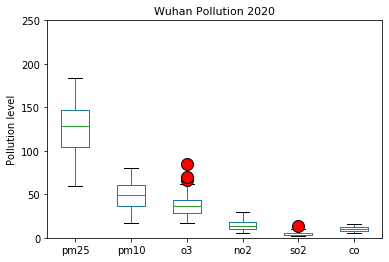

In [111]:
# Create a box plot with outliers

# plot. Set color of marker face and marker edge

flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='k')
box_plot = wuhan_lockdown_df.boxplot(grid=False, column=['pm25','pm10', 'o3', 'no2', 'so2', 'co'], flierprops=flierprops)

# set y limit
plt.ylim(0,250)
# Set the title and y axis label
box_plot.set_title('Wuhan Pollution 2020', fontsize=11)
box_plot.set_ylabel("Pollution level")
plt.show()

In [112]:
# Reset index
wuhan_lockdown_df = wuhan_lockdown_df.reset_index("date")


In [113]:
# Extract the month-day from the date and create a new column
wuhan_lockdown_df["new_date"] = wuhan_lockdown_df["date"].dt.strftime("%m-%d")
wuhan_lockdown_df

,date,pm25,pm10,o3,no2,so2,co,AQI,new_date
0,2020-01-23,173,71,21,12,3,12,173,01-23
1,2020-01-24,174,39,28,7,2,5,174,01-24
2,2020-01-25,116,46,23,7,2,7,116,01-25
3,2020-01-26,131,32,30,6,3,5,131,01-26
4,2020-01-27,104,45,28,6,2,8,104,01-27
...,...,...,...,...,...,...,...,...,...
72,2020-04-04,156,60,61,18,5,10,156,04-04
73,2020-04-05,150,64,85,20,5,9,150,04-05
74,2020-04-06,151,55,52,17,5,7,151,04-06
75,2020-04-07,100,55,62,23,6,8,100,04-07


In [114]:
# Reset index
wuhan_2019_df = wuhan_2019_df.reset_index("date")


In [115]:
# Extract the month-day from the date and create a new column
wuhan_2019_df["new_date"] = wuhan_2019_df["date"].dt.strftime("%m-%d")
wuhan_2019_df

,date,pm25,pm10,o3,no2,so2,co,AQI,new_date
0,2019-01-23,188,95,42,53,9,17,188,01-23
1,2019-01-24,191,93,47,52,9,17,191,01-24
2,2019-01-25,174,120,34,45,8,17,174,01-25
3,2019-01-26,204,115,21,31,9,17,204,01-26
4,2019-01-27,221,78,20,35,12,13,221,01-27
...,...,...,...,...,...,...,...,...,...
69,2019-04-04,114,78,52,42,5,13,114,04-04
70,2019-04-05,154,53,46,24,3,10,154,04-05
71,2019-04-06,122,72,63,36,6,11,122,04-06
72,2019-04-07,133,83,75,41,10,13,133,04-07


In [116]:
# Merge two data sets
new_wuhan_df = wuhan_2019_df.merge(wuhan_lockdown_df, on= "new_date")
new_wuhan_df

,date_x,pm25_x,pm10_x,o3_x,no2_x,so2_x,co_x,AQI_x,new_date,date_y,pm25_y,pm10_y,o3_y,no2_y,so2_y,co_y,AQI_y
0,2019-01-23,188,95,42,53,9,17,188,01-23,2020-01-23,173,71,21,12,3,12,173
1,2019-01-24,191,93,47,52,9,17,191,01-24,2020-01-24,174,39,28,7,2,5,174
2,2019-01-25,174,120,34,45,8,17,174,01-25,2020-01-25,116,46,23,7,2,7,116
3,2019-01-26,204,115,21,31,9,17,204,01-26,2020-01-26,131,32,30,6,3,5,131
4,2019-01-27,221,78,20,35,12,13,221,01-27,2020-01-27,104,45,28,6,2,8,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2019-04-04,114,78,52,42,5,13,114,04-04,2020-04-04,156,60,61,18,5,10,156
70,2019-04-05,154,53,46,24,3,10,154,04-05,2020-04-05,150,64,85,20,5,9,150
71,2019-04-06,122,72,63,36,6,11,122,04-06,2020-04-06,151,55,52,17,5,7,151
72,2019-04-07,133,83,75,41,10,13,133,04-07,2020-04-07,100,55,62,23,6,8,100


In [117]:
# Rename the columns for intuitive naming
new_wuhan_df = new_wuhan_df.rename(columns={'date_x':'Date 2019', 'pm25_x':'2019 pm25', 'pm10_x':'2019 pm10', 'o3_x':'2019 o3', 'no2_x':'2019 no2', 'so2_x':'2019 so2', 'co_x':'2019 co', 'AQI_x':'2019 AQI', 'date_y':'Date 2020', 'pm25_y':'2020 pm25', 'pm10_y':'2020 pm10', 'o3_y':'2020 o3', 'no2_y':'2020 no2', 'so2_y':'2020 so2', 'co_y':'2020 co', 'AQI_y':'2020 AQI'})
new_wuhan_df.head()

,Date 2019,2019 pm25,2019 pm10,2019 o3,2019 no2,2019 so2,2019 co,2019 AQI,new_date,Date 2020,2020 pm25,2020 pm10,2020 o3,2020 no2,2020 so2,2020 co,2020 AQI
0,2019-01-23,188,95,42,53,9,17,188,01-23,2020-01-23,173,71,21,12,3,12,173
1,2019-01-24,191,93,47,52,9,17,191,01-24,2020-01-24,174,39,28,7,2,5,174
2,2019-01-25,174,120,34,45,8,17,174,01-25,2020-01-25,116,46,23,7,2,7,116
3,2019-01-26,204,115,21,31,9,17,204,01-26,2020-01-26,131,32,30,6,3,5,131
4,2019-01-27,221,78,20,35,12,13,221,01-27,2020-01-27,104,45,28,6,2,8,104


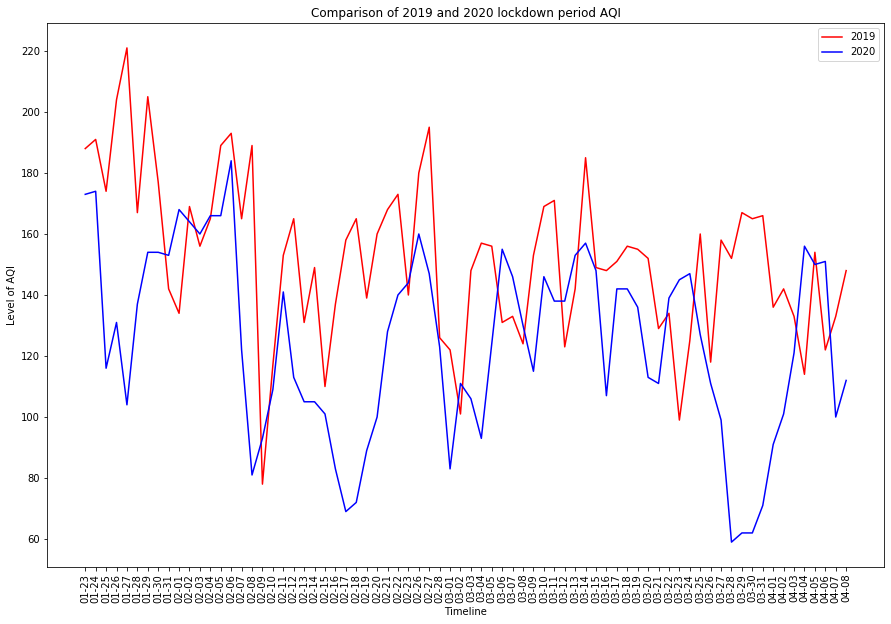

In [123]:
# Create a line plot that compares AQI for lockdown periods between 2019 and 2020
x_axis=new_wuhan_df["new_date"]
y_axis=new_wuhan_df["2019 AQI"]
x2=new_wuhan_df["new_date"]
y2=new_wuhan_df["2020 AQI"]

plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
wuhan_2019, = plt.plot(x_axis,y_axis, color="red", label="2019")
wuhan_2020, = plt.plot(x2,y2,  color="blue", label="2020")

# Create a legend for our chart
plt.legend(handles=[wuhan_2019, wuhan_2020], loc="best")
# set the title and label for the plot
plt.title("Comparison of 2019 and 2020 lockdown period AQI")
plt.xlabel("Timeline")
plt.ylabel("Level of AQI")
plt.show()

In [124]:
# Compute a mean of the pollutants during the same months in 2019 as lockdown period in 2020
wuhan_2019_mean = wuhan_2019_df.mean()
wuhan_2019_mean[0:6]

pm25    152.081081
pm10     69.729730
o3       32.648649
no2      27.554054
so2       5.608108
co       11.716216
dtype: float64

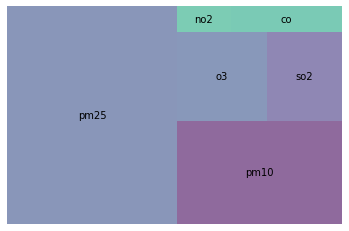

In [128]:
# Create a treemap for the pollutants for the period in 2019
squarify.plot(sizes=wuhan_2019_mean[0:6], label=["pm25", "pm10", "o3", "so2", "no2", "co",], alpha=.6)
plt.axis('off')
plt.show()

In [129]:
# Compute a mean of the pollutants during the lockdown period
wuhan_lockdown_mean = wuhan_lockdown_df.mean()
wuhan_lockdown_mean[0:6]

pm25    124.051948
pm10     48.311688
o3       37.714286
no2      14.259740
so2       4.896104
co       10.116883
dtype: float64

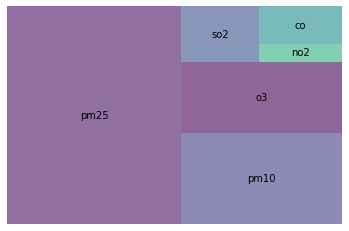

In [130]:
# Create a treemap for the pollutants for the lockdown period in 2020
squarify.plot(sizes=wuhan_lockdown_mean[0:6], label=["pm25", "pm10", "o3", "so2", "no2", "co",], alpha=.6)
plt.axis('off')
plt.show()